In [8]:
!jupyter nbconvert --to python code.ipynb 

[NbConvertApp] Converting notebook code.ipynb to python
[NbConvertApp] Writing 2268 bytes to code.py


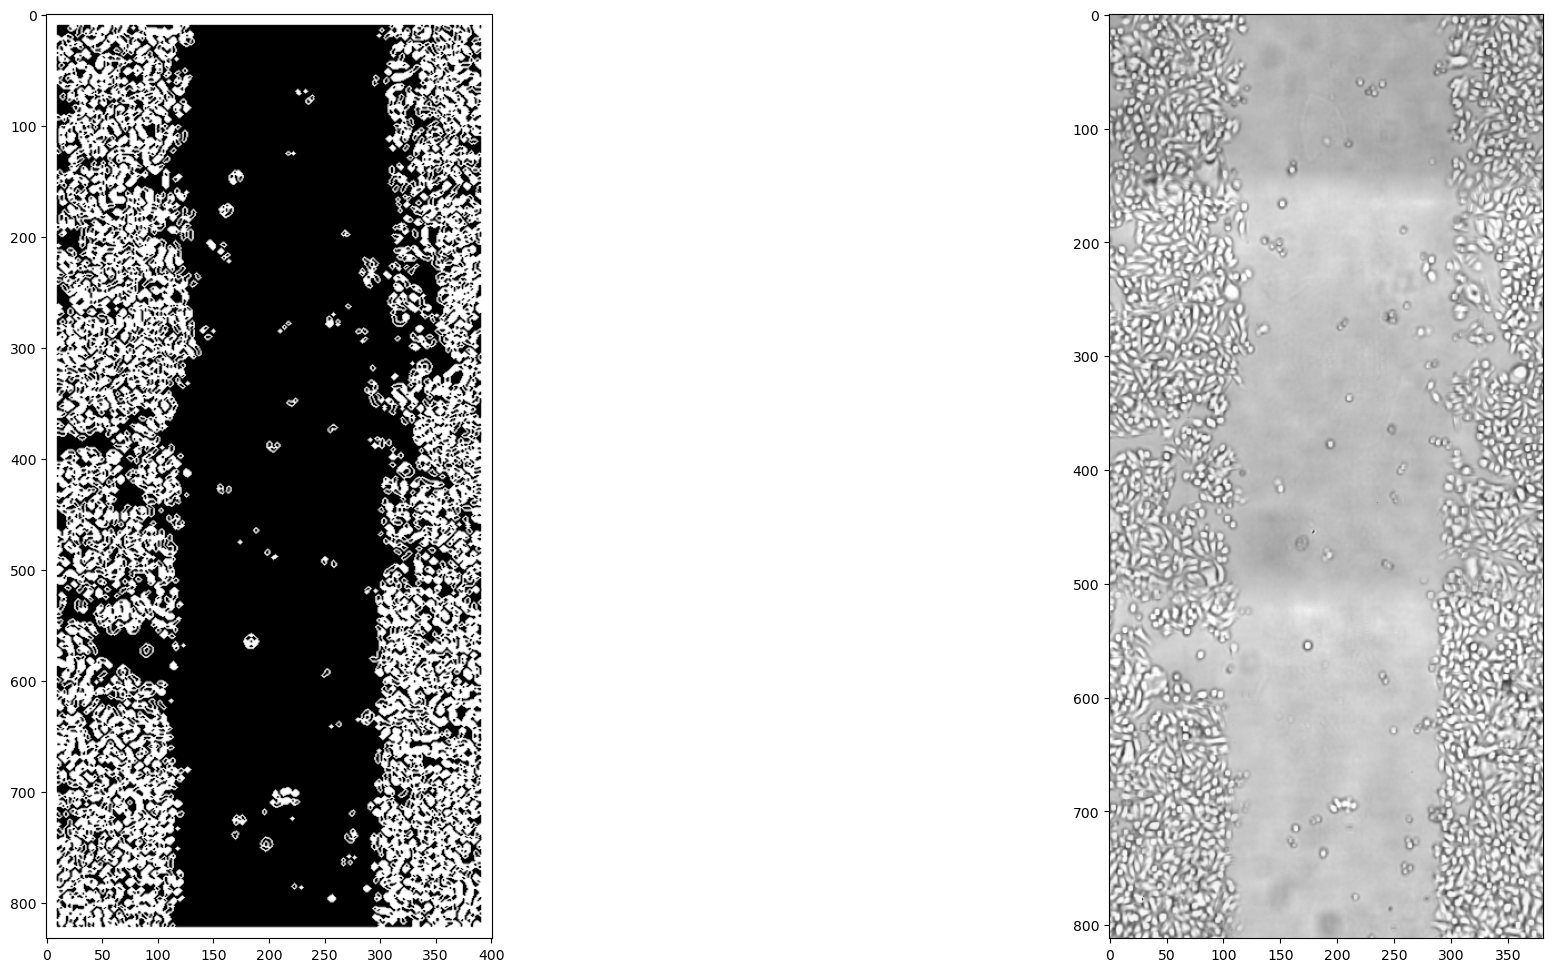

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage import io
from PIL import Image as im


# Loading the image in grayscale and applying Gaussian blur
image = cv2.imread('imagem.png')

scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

# Function that creates a new white image using cv2
def new_image(img):
    dimensions = img.shape
    w, h = dimensions[0], dimensions[1]
    new_img = np.ones((w, h, 3), dtype = np.uint8)
    new_img = 255* new_img
    return new_img
  
# resize image
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

imsize = int(image.shape[1]) * int(image.shape[0])

original = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original = cv2.GaussianBlur(original, (9,9), 0)

# Applying adaptive threshold to account for the darkness difference
adapt_thresh = cv2.adaptiveThreshold(original, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 5, 3)

# Applying entropy 
entropy_trs = entropy(adapt_thresh, disk(1)) 
trs_value = threshold_otsu(entropy_trs) 
entropy_img = entropy_trs <= trs_value

entropy_img = entropy_img.astype(int)
entropy_img = (entropy_img*255).astype(np.uint8)

entropy_trs2 = entropy(entropy_img, disk(1)) 
trs_value2 = threshold_otsu(entropy_trs2) 
entropy_img2 = entropy_trs2 <= trs_value2

entropy_img2 = entropy_img2.astype(int)
entropy_img2 = (entropy_img2*255).astype(np.uint8)

entropy_padded =  cv2.copyMakeBorder(entropy_img2, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, 0)

contours, hierarchy = cv2.findContours(entropy_padded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
white2 = new_image(entropy_padded)
    
masked = cv2.drawContours(image=white2, contours=contours, contourIdx=-1, color=(0, 0, 0), thickness = -1, lineType=cv2.LINE_AA)

fig = plt.figure(figsize = [25,12])
ax = fig.subplot_mosaic("AB")
ax["A"].imshow(masked)
ax["B"].imshow(image)

area = cv2.countNonZero(entropy_padded)